In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('SP500_daily')
df = df[['Date','Open', 'Close']].copy()

<Axes: xlabel='Date'>

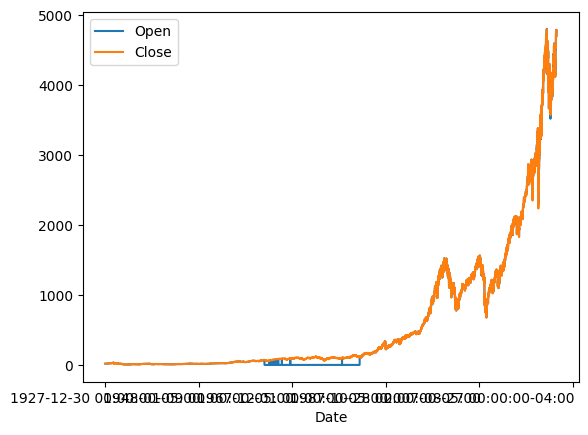

In [39]:
df.plot(x='Date')

In [40]:
arr = np.loadtxt('SP500_daily_pc_change.csv', delimiter=',', skiprows=1)

array([ 0.        ,  0.        ,  0.        , ...,  0.49391913,
       -0.24810781, -0.15340892])